In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import r2_score
import scipy.stats as stats
import warnings

In [90]:
params = pd.read_csv("parametros.csv")
display(params)

,L,k,x0,b,r2,Data
0,16.944972,0.026502,38.513512,3.679864,0.995325,13-04-2024
1,20.902157,0.020874,116.203032,0.817205,0.995088,04-05-2024
2,22.469358,0.019274,25.764929,5.506866,0.997082,31-05-2024
3,22.473252,0.019270,153.094787,0.473504,0.997911,08-06-2024
4,22.599498,0.019126,136.885198,0.657387,0.998378,22-06-2024
5,22.533163,0.019199,141.498546,0.596765,0.998737,05-07-2024
6,22.725996,0.018918,157.444539,0.453635,0.998833,20-07-2024
7,23.086545,0.018357,169.006477,0.389761,0.998812,17-08-2024
8,23.101269,0.018333,165.250295,0.418696,0.998946,11-09-2024
9,23.113806,0.018312,166.110055,0.413112,0.999048,30-09-2024


In [91]:
data = pd.read_csv("pesos.csv")
display(data)

,data,peso
0,2024-02-07,6.50
1,2024-02-28,8.50
2,2024-03-08,9.70
3,2024-03-13,10.50
4,2024-04-13,13.15
5,2024-05-04,15.55
6,2024-05-31,17.80
7,2024-06-08,18.30
8,2024-06-22,19.20
9,2024-07-01,19.50


In [92]:
# Certificar-se de que a coluna 'data' é do tipo datetime
data['data'] = pd.to_datetime(data['data'])

# Converter a coluna de data para dias desde a primeira data
data['dias'] = (data['data'] - data['data'].min()).dt.days

# Converter a coluna de data para datetime
data_inicio = pd.to_datetime('2023-11-30')

# Converter a coluna de data para dias desde o nascimento
data['dias_inicio'] = (data['data'] - data_inicio).dt.days

# Dados de entrada para o ajuste
x_data = data['dias_inicio']
y_data = data['peso']

In [93]:
#Escolher modelo
data_desejada = '06-11-2024'
params_desejados = params.loc[params['Data'] == data_desejada]
print(params_desejados)
L = params_desejados['L'].values[0]
k = params_desejados['k'].values[0]
x0 = params_desejados['x0'].values[0]
b = params_desejados['b'].values[0]

            L         k          x0         b        r2        Data
11  23.340957  0.017901  169.078242  0.408989  0.998921  06-11-2024


In [94]:
def logistic_function(x, L, k, x0, b):
    return L / (1 + b * np.exp(-k * (x - x0)))

In [95]:
x = np.linspace(0, 400, 1000)
y_model = logistic_function(x, L, k, x0, b)

r2 = r2_score(y_data, logistic_function(x_data, L, k, x0, b))
print("R²:", r2)

R²: 0.998920893815167


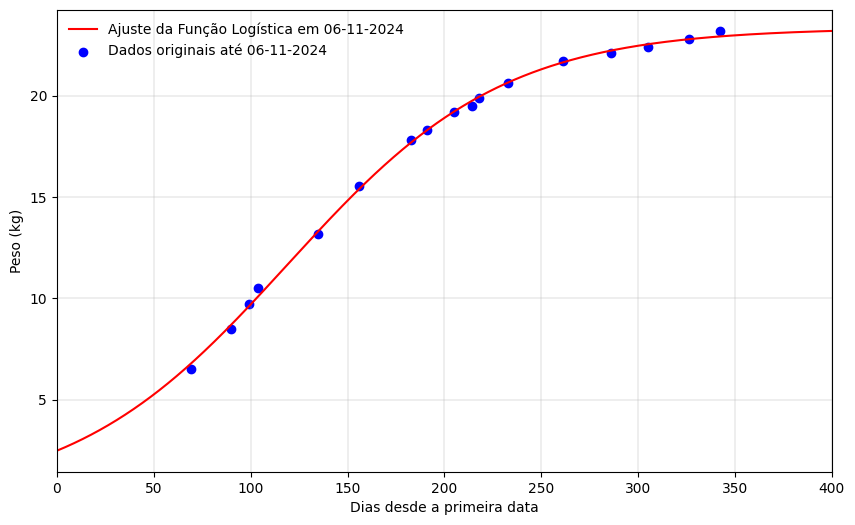

In [96]:
plt.figure(figsize=(10, 6))

#modelo antigo
plt.plot(x, y_model, label='Ajuste da Função Logística em ' + data_desejada, color='red')
plt.scatter(data['dias_inicio'], data['peso'], label='Dados originais até ' + data['data'].max().strftime('%d-%m-%Y'), color='blue')
plt.xlim(0,x[-1])
plt.xlabel('Dias desde a primeira data')
plt.ylabel('Peso (kg)')
plt.legend(frameon = False)
plt.grid(True,which='both', axis='both', linestyle='-', linewidth=0.3)

## Análise do peso mínimo e máximo

In [97]:
peso_nascimento = logistic_function(0, L, k, x0, b)
print(f'peso ao nascer: {peso_nascimento:.1f} kg') 

peso ao nascer: 2.5 kg


In [98]:
mediaL = params['L'].values[-5:].mean()
desvioL = params['L'].values[-5:].std()
# Erro padrão da média
erro_padrao = stats.sem(params['L'].values[-5:])
intConf = stats.t.interval(0.95, len(params['L'].values[-5:])-1, loc=mediaL, scale=erro_padrao)
print("Peso máximo e Intervalo de confiança de 95 % ")
print(f"{mediaL:.2f} \u00B1 {(intConf[1]-intConf[0])/2:.2f} kg")


Peso máximo e Intervalo de confiança de 95 % 
23.17 ± 0.13 kg


C:\Users\willi\AppData\Local\Temp\ipykernel_18876\1965817649.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


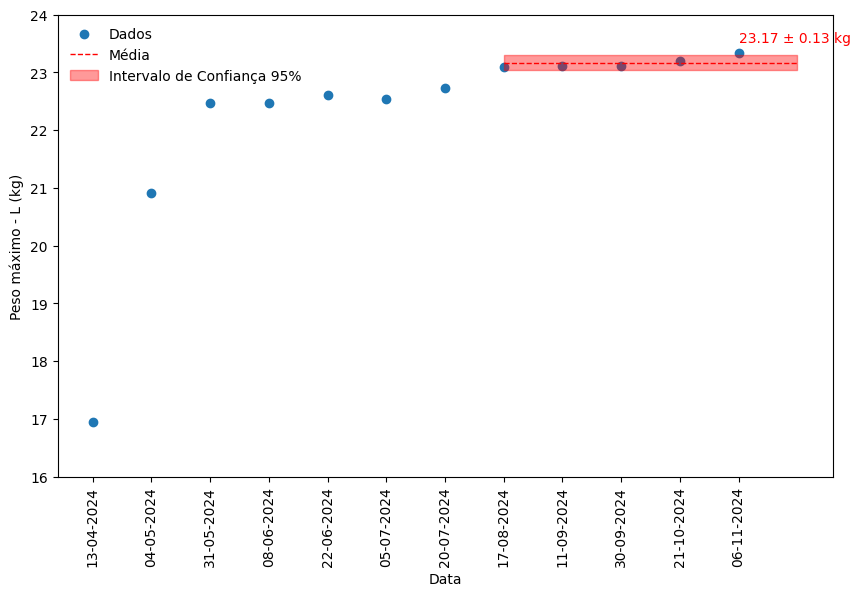

In [99]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(params['Data'].values, params['L'].values, label='Dados')
plt.hlines(mediaL, len(params['L'])-5, len(params['L']), linestyles='dashed', color = 'red',linewidth=1, label = 'Média')

# Adicionando a região sombreada do intervalo de confiança
plt.fill_between([len(params['L'])-5, len(params['L'])], intConf[0], intConf[1], color='red', alpha=0.4, label='Intervalo de Confiança 95%')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xticks(params['Data'].values)
ax.text(len(params['L'])-1,mediaL + 0.35, f"{mediaL:.2f} \u00B1 {(intConf[1]-intConf[0])/2:.2f} kg", color = 'red' )
plt.ylim([16, 24])
plt.ylabel('Peso máximo - L (kg)')
plt.xlabel('Data')
plt.legend(loc = 'upper left', frameon = False)
plt.show()


## $R^2$ ao longo das análises

C:\Users\willi\AppData\Local\Temp\ipykernel_18876\3028531610.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


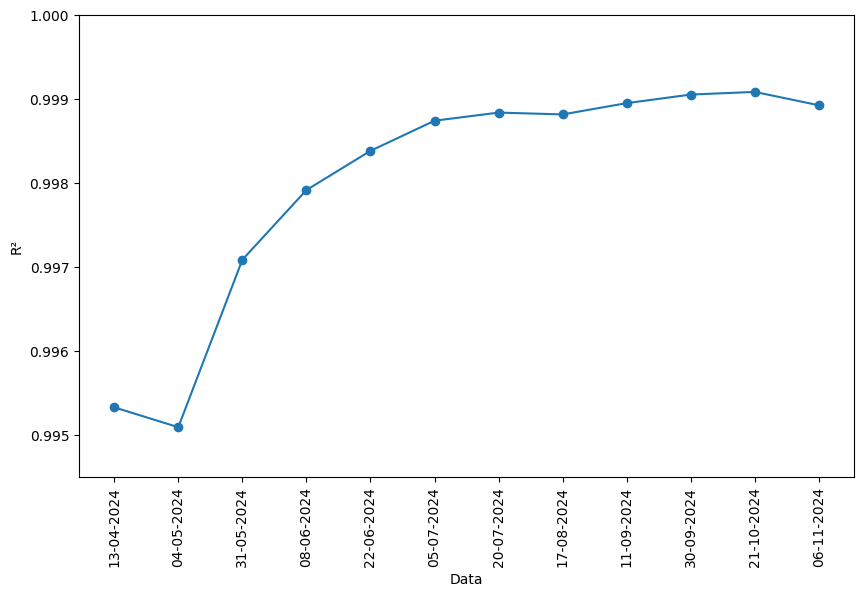

In [100]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(params['Data'].values, params['r2'].values,'-o', label='Dados')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xticks(params['Data'].values)
plt.ylim([0.9945, 1])
plt.ylabel('R²')
plt.xlabel('Data')
plt.show()